# Principles of Data Visualization

_Authors:_ Noelle Brown (mostly), Tim Book

---

## Learning Objectives
- Identify what type of visualization may be appropriate for a given scenario.
- Generate bar graphs, histograms, scatter plots, and line plots in `matplotlib` and `seaborn`.
- Generate heat maps in `seaborn`.
- Critique data visualizations and implement changes.

<details><summary>Let's get started with a question: what is the point of creating a visualization for data?</summary>
    
- "Use a picture. It's worth a thousand words." - Tess Flanders, 1911
- We generally use visualizations in order to efficiently and/or effectively communicate information.
</details>

## First, what *not* to do...

<img src="./images/bad1.jpg" style="height: 500px">

<details><summary>What is wrong with the above visualization?</summary>
    
- The y-axis is flipped - most people expect 0 to be at the bottom of the graph, providing a misleading graph for people who just glance at the visualization.
</details>

<img src="./images/bad2.jpg" style="height: 400px">

*Above images from [this source](https://teachdatascience.com/ethicaldataviz/).*

<details><summary>What is wrong with the above visualization?</summary>
    
- The x-axis is not arranged according to dates, but according to cases. This shows a misleading decline in cases that does not actually exist.
</details>

<img src="./images/bad3.png" style="height: 350px">

*Above image from [this source](https://www.datarevelations.com/resources/hey-your-tableau-public-viz-sucks-revisited/).*

<details><summary>What is wrong with the above visualization?</summary>
    
- In general, this graph is not super clear. The reader is unsure of what is being conveyed here.
- The main problem with this visual is the color scale! As a general rule, never use red and green together in a visualization. Stick with accessible, color blind friendly color palettes. Read more about this [here](https://venngage.com/blog/color-blind-friendly-palette/).
</details>

You can see more bad visualizations [here](https://viz.wtf/)!

## What to do...

1. Less is more. Get rid of everything you don’t need and only focus on what you are trying to communicate.
> “Above all else show the data.” “Graphical excellence consists of complex ideas communicated with clarity, precision, and efficiency.”  
> - Tufte in [Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/1930824130)
2. Use color to help communicate
> Color should be used to emphasize, not distract the audience. We can use color to draw the audience's eyes where we want them to look. If you are concerned that your image is too "cluttered," then consider toning down your use of color.
3. Design for Accessibility
> Color Blindness/ Color Vision Deficiency (CVD) can take many forms. Red-green is 99% of cases.  
> - "Red–green color blindness is the most common form, followed by blue–yellow color blindness and total color blindness. Red–green color blindness affects up to 8% of males and 0.5% of females of Northern European descent." - [Wikipedia](https://en.wikipedia.org/wiki/Color_blindness)

### Let's do it!

First, let's download our data. This data is from [Kaggle](https://www.kaggle.com/crawford/80-cereals?select=cereal.csv) and is part of a [Makeover Monday challenge](https://www.makeovermonday.co.uk/data/) to improve a visualization.

<img src="./images/cereal.jpeg" style="height: 35==200px">

In [2]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Import and view cereal data
cereal = pd.read_csv('cereal.csv')
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
cereal['calories_from_protein'] = cereal['protein'] * 4
cereal['protein_to_calorie_ratio'] = (cereal['calories_from_protein'] / cereal['calories']).round(2)

cereal['cereal_rank'] = cereal['protein_to_calorie_ratio'].rank(ascending=False)
#cereal['rank']
cereal['Rank1']= ["low" if x <=2 else "mid" if x <=5 else "good" for x in cereal['protein']]
cereal.sort_values('cereal_rank').head(20)








,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,calories_from_protein,protein_to_calorie_ratio,cereal_rank,Rank1
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,16,0.32,1.0,mid
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,16,0.23,2.5,mid
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,16,0.23,2.5,mid
67,Special K,K,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324,24,0.22,4.5,good
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999,24,0.22,4.5,good
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392,20,0.20,6.0,mid
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917,16,0.16,8.5,mid
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645,8,0.16,8.5,low
41,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.0,0.67,45.328074,16,0.16,8.5,mid
56,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6,110,25,3,1.0,0.50,49.511874,16,0.16,8.5,mid


In [5]:
#According to the Dietary Guidelines for Americans 2020-2025 , adults over 19 years should get 10-35% 
# of their total daily calorie intake from high quality protein sources. Children ages 4–18 should consume 
# 10-30% of their total calorie intake as protein. One gram (g) of protein contains around 4 calories

In [6]:
#cereal.isnull() # will only retun True if nulls are present


In [7]:
#cereal.describe(include='all').round(1) or 
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,calories_from_protein,protein_to_calorie_ratio,cereal_rank
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705,10.181818,0.099740,39.000000
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289,4.379159,0.052188,22.221226
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851,4.000000,0.030000,1.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094,8.000000,0.070000,18.500000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,12.000000,0.090000,39.500000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,12.000000,0.120000,58.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912,24.000000,0.320000,76.000000


## Bar Charts

> "A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent." -[Wikipedia](https://en.wikipedia.org/wiki/Bar_chart)

In [8]:
# Get top 10 most sugary cereals, save as a variable
sugary = cereal.sort_values(by = 'sugars', ascending = False)[:10]


In [9]:
# MATPLOTLIB - Plot Bar Chart
plt.figure(figsize= (15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

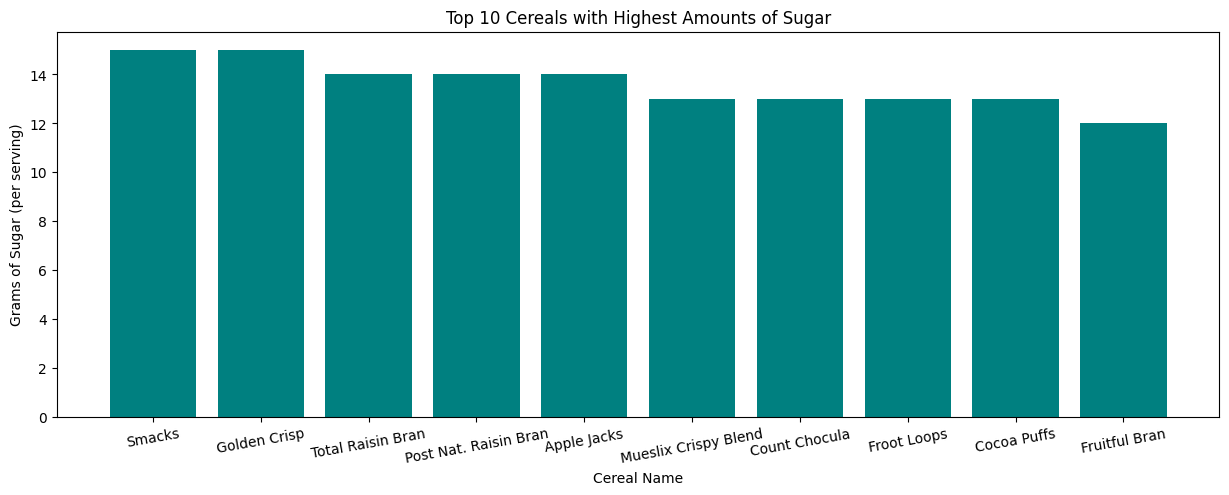

In [10]:

# MATPLOTLIB
#Plot it! Let's use a bar chart to visualize the top 10 most sugary cereals

# Size
plt.figure(figsize = (15, 5))

# Bar chart
plt.bar(sugary['name'], sugary['sugars'], color = 'teal') # colors: https://matplotlib.org/stable/gallery/color/named_colors.html

# Example colors: 'b', 'teal', '#81cdc6'

# Create a descriptive title
plt.title('Top 10 Cereals with Highest Amounts of Sugar')

# Rotate text
plt.xticks(rotation = 10)

# Add axis labels
plt.xlabel('Cereal Name')
plt.ylabel('Grams of Sugar (per serving)'); # semicolon suppresses text output

C:\Users\jjs61\AppData\Local\Temp\ipykernel_8372\2931646648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sugary['name'], y = sugary['sugars'], palette = 'Paired')


<Axes: xlabel='name', ylabel='sugars'>

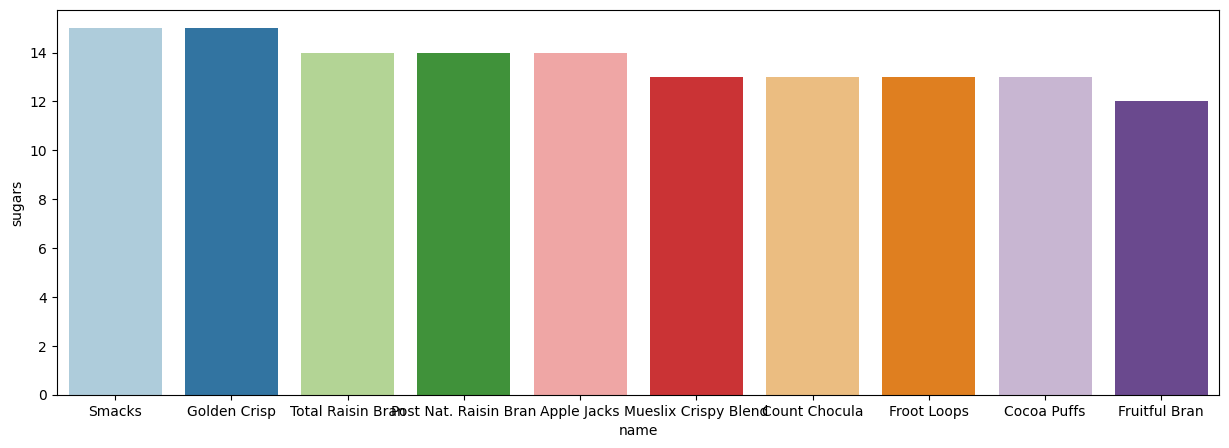

In [11]:
# SEABORN - Plot Bar Chart

plt.figure(figsize = (15, 5))

# Bar chart
sns.barplot(x = sugary['name'], y = sugary['sugars'], palette = 'Paired')



In [12]:
sugary['name'][::-1]

28            Fruitful Bran
14              Cocoa Puffs
24              Froot Loops
18            Count Chocula
46     Mueslix Crispy Blend
6               Apple Jacks
52    Post Nat. Raisin Bran
70        Total Raisin Bran
30             Golden Crisp
66                   Smacks
Name: name, dtype: object

<BarContainer object of 10 artists>

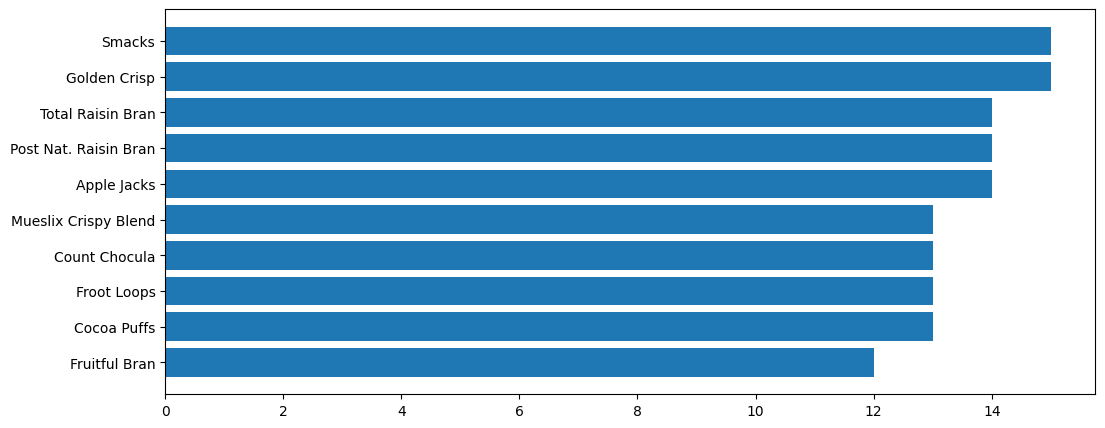

In [13]:
# matplot
plt.figure(figsize = (12, 5))
plt.barh(sugary['name'][::-1], sugary['sugars'][::-1])


#plt.barh(sugary['name'][::-1], sugary['sugars'][::-1])





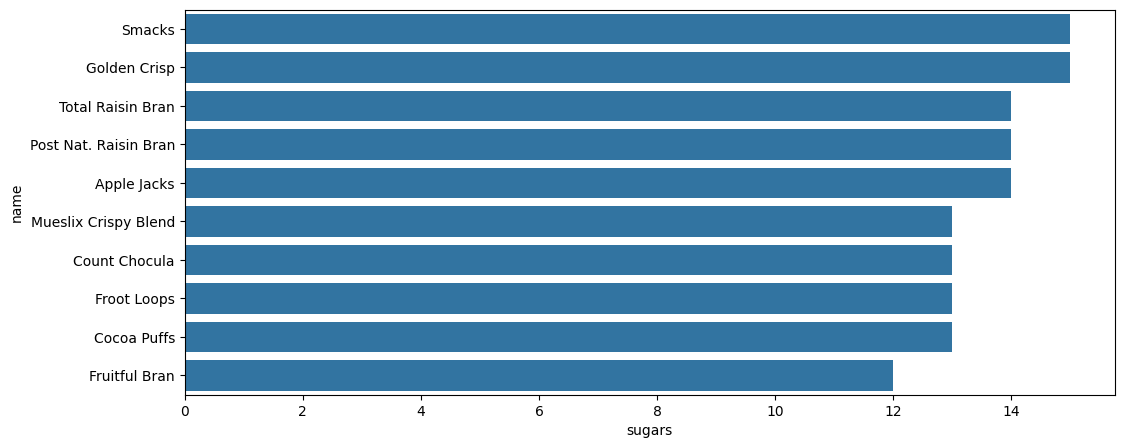

In [14]:
# SEABORN - Plot Horizontal Bar Chart
plt.figure(figsize= (12, 5))

sns.barplot(y=sugary['name'], x=sugary['sugars'], orient='h');


## Histograms
> Histograms are used to display the distribution of numerical data.

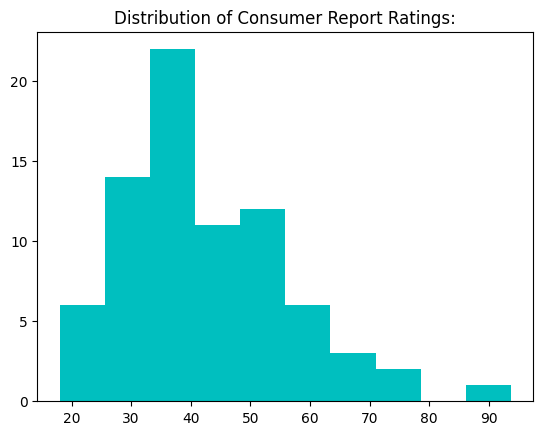

In [15]:
# MATPLOTLIB - Plot a histogram of cereal rating

# Plot it
plt.hist(cereal['rating'], color='c')
# Create a descriptive title
plt.title('Distribution of Consumer Report Ratings:');


<Axes: ylabel='Count'>

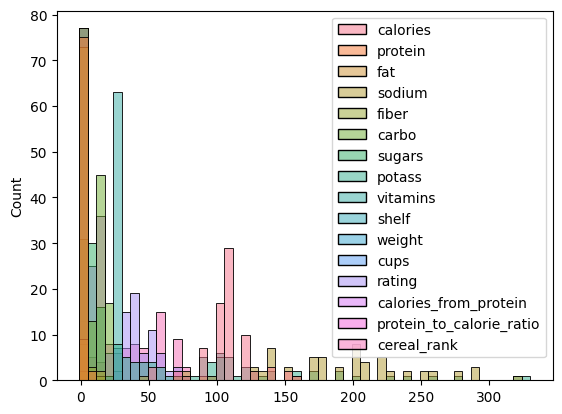

In [16]:
sns.histplot(cereal)

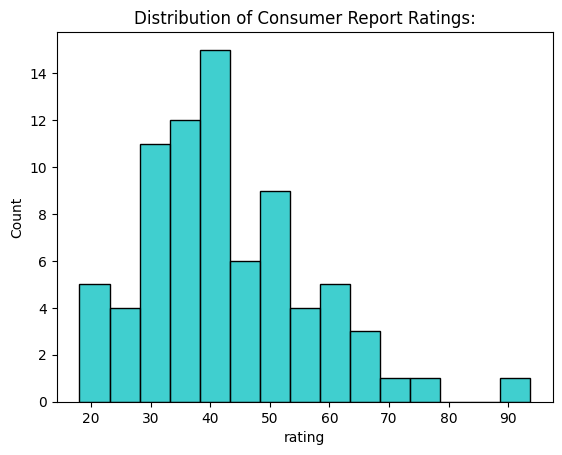

In [17]:
# SEABORN - Plot a histogram of cereal rating
sns.histplot(cereal['rating'], color='c', bins= 15)
plt.xlabel = 'Rating'
# Create a descriptive title
plt.title('Distribution of Consumer Report Ratings:');


## Boxplots
> Boxplot are used to display the distribution of numerical data.

Text(0.5, 1.0, 'Consumer Report Ratings')

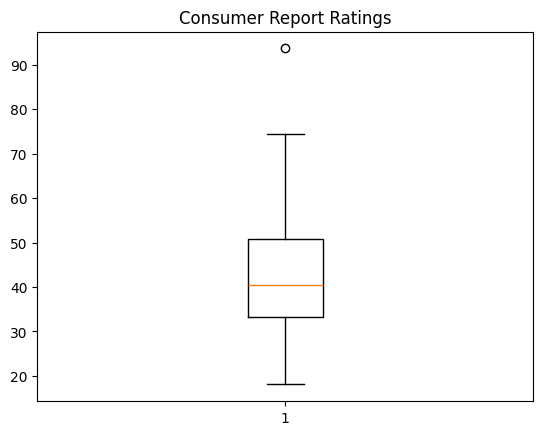

In [18]:
# MATPLOTLIB - Plot a boxplot of cereal rating

# Plot it
plt.boxplot(cereal['rating']);
# Create a descriptive title
plt.title('Consumer Report Ratings')


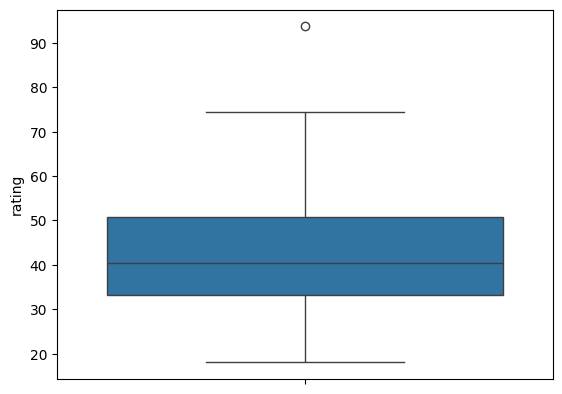

In [19]:
# SEABORN - Plot a boxplot of cereal rating
sns.boxplot(y = cereal['rating'], orient='v');

In [20]:
#BONUS - What cereal has that super high rating?!
cereal[cereal['rating'] >90]



,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,calories_from_protein,protein_to_calorie_ratio,cereal_rank,Rank1
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912,16,0.32,1.0,mid


In [21]:
cereal[cereal['protein'] > 5]


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,calories_from_protein,protein_to_calorie_ratio,cereal_rank,Rank1
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999,24,0.22,4.5,good
67,Special K,K,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324,24,0.22,4.5,good


## Scatter Plots
> Scatter plots are used to display the relationship between two variables.

In [22]:
cereal['type'].value_counts(normalize=True)

type
C    0.961039
H    0.038961
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Higher calories have a lower protein to calorie ratio')

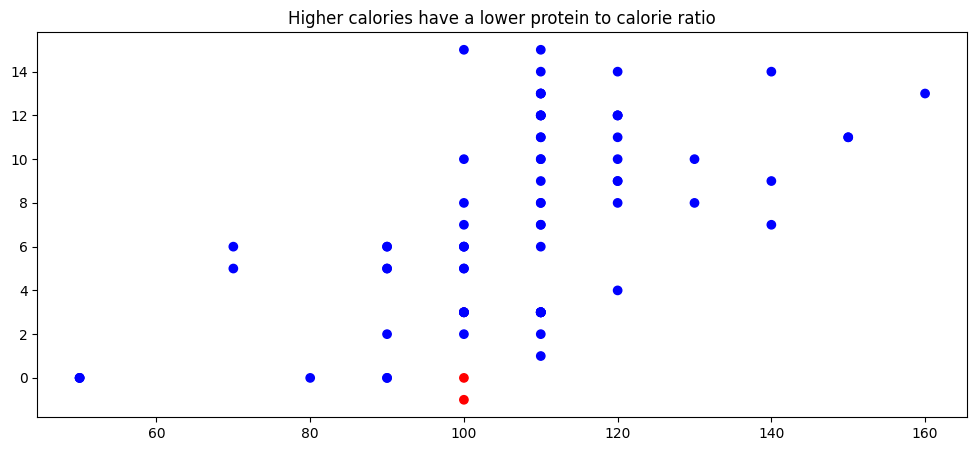

In [23]:
plt.figure(figsize = (12,5))
colors = {'C': 'blue', 'H': 'red'}   # create dictionary by type of cereal to establish color
plt.scatter(x = cereal['calories'], y= cereal["sugars"], color = cereal['type'].map(colors))
plt.title("Higher calories have a lower protein to calorie ratio")





<Axes: xlabel='calories', ylabel='sugars'>

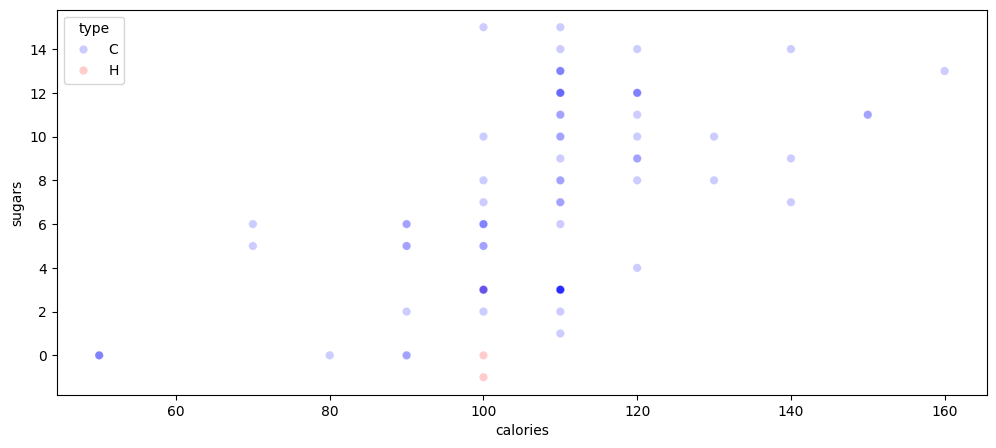

In [24]:
# MATPLOTLIB - Create a scatter plot of calories vs. sugar
    
# Size
plt.figure(figsize = (12,5))
# Plot it
sns.scatterplot(x = cereal['calories'], 
                y = cereal['sugars'], 
                hue=cereal['type'], 
                palette= ['b', 'r'],
                alpha = 0.2)

# Create a descriptive title

# Add axis labels


In [25]:
# SEABORN - Create a scatter plot of calories vs. sugar
sns.scatterplot(cereal_analysis, x=cereal_analysis['protein'], y='rating')

NameError: name 'cereal_analysis' is not defined

## Line Graphs
> Line graphs (also known as line plots or line charts) use lines to connect data points to show the changes in numerical values over time.

In [ ]:
# Generate data over time

# Generate dates
dates = pd.date_range('3-1-22', '7-30-22')

In [ ]:
# Generate bowls eaten
bowls_eaten = np.random.poisson(1, size = 152)

TypeError: 'str' object is not callable

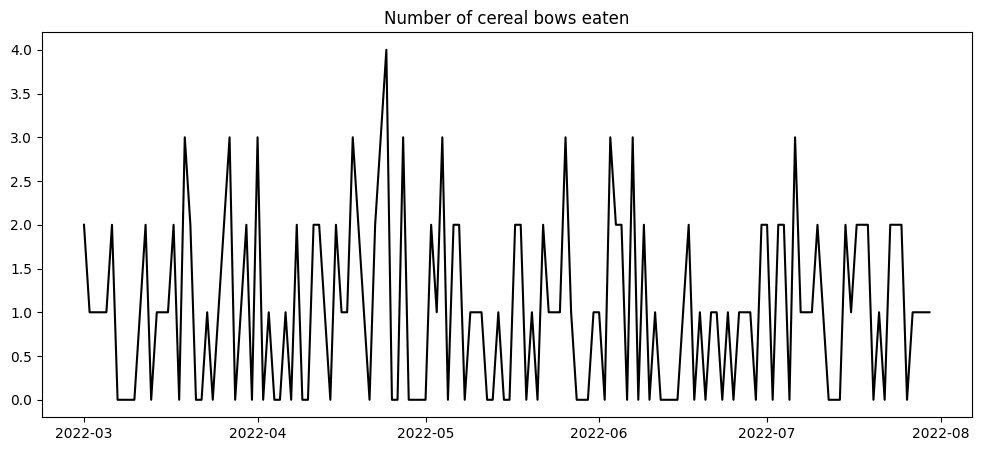

In [ ]:
# MATPLOTLIB - Create a line plot of the number of bowls of cereal I've consumed

# Size
plt.figure(figsize=(12,5))
# Plot it 
plt.plot(dates, bowls_eaten, color = 'black')
# Create a descriptive title
plt.title("Number of cereal bows eaten")
plt.ylabel('Cerial Bowls')
# Add axis labels


TypeError: 'str' object is not callable

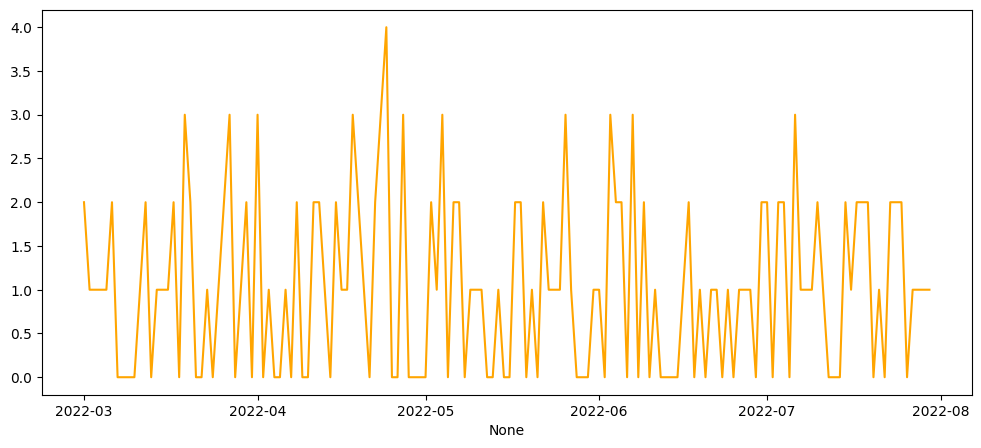

In [ ]:
# SEABORN - Create a line plot of the number of bowls of cereal I've consumed
plt.figure(figsize= (12,5))
sns.lineplot(x=dates, y=bowls_eaten, color = "orange")
plt.xlabel('Date')
plt.ylabel('Bowl Eaten')

## Heat Maps
> Heat maps use color to show the strength of a relationship between two or more variables.

A commonly seen implementation of a heatmap uses the [Seaborn library](https://seaborn.pydata.org).

In [ ]:
cereal.corr(numeric_only=True).round(2)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,calories_from_protein,protein_to_calorie_ratio,cereal_rank
calories,1.00,0.02,0.50,0.30,-0.29,0.25,0.56,-0.07,0.27,0.10,0.70,0.09,-0.69,0.02,-0.45,0.35
protein,0.02,1.00,0.21,-0.05,0.50,-0.13,-0.33,0.55,0.01,0.13,0.22,-0.24,0.47,1.00,0.84,-0.86
fat,0.50,0.21,1.00,-0.01,0.02,-0.32,0.27,0.19,-0.03,0.26,0.21,-0.18,-0.41,0.21,-0.04,-0.00
sodium,0.30,-0.05,-0.01,1.00,-0.07,0.36,0.10,-0.03,0.36,-0.07,0.31,0.12,-0.40,-0.05,-0.16,0.26
fiber,-0.29,0.50,0.02,-0.07,1.00,-0.36,-0.14,0.90,-0.03,0.30,0.25,-0.51,0.58,0.50,0.71,-0.61
carbo,0.25,-0.13,-0.32,0.36,-0.36,1.00,-0.33,-0.35,0.26,-0.10,0.14,0.36,0.05,-0.13,-0.29,0.17
sugars,0.56,-0.33,0.27,0.10,-0.14,-0.33,1.00,0.02,0.13,0.10,0.45,-0.03,-0.76,-0.33,-0.50,0.51
potass,-0.07,0.55,0.19,-0.03,0.90,-0.35,0.02,1.00,0.02,0.36,0.42,-0.50,0.38,0.55,0.62,-0.59
vitamins,0.27,0.01,-0.03,0.36,-0.03,0.26,0.13,0.02,1.00,0.30,0.32,0.13,-0.24,0.01,-0.10,0.09
shelf,0.10,0.13,0.26,-0.07,0.30,-0.10,0.10,0.36,0.30,1.00,0.19,-0.34,0.03,0.13,0.13,-0.18


<Axes: >

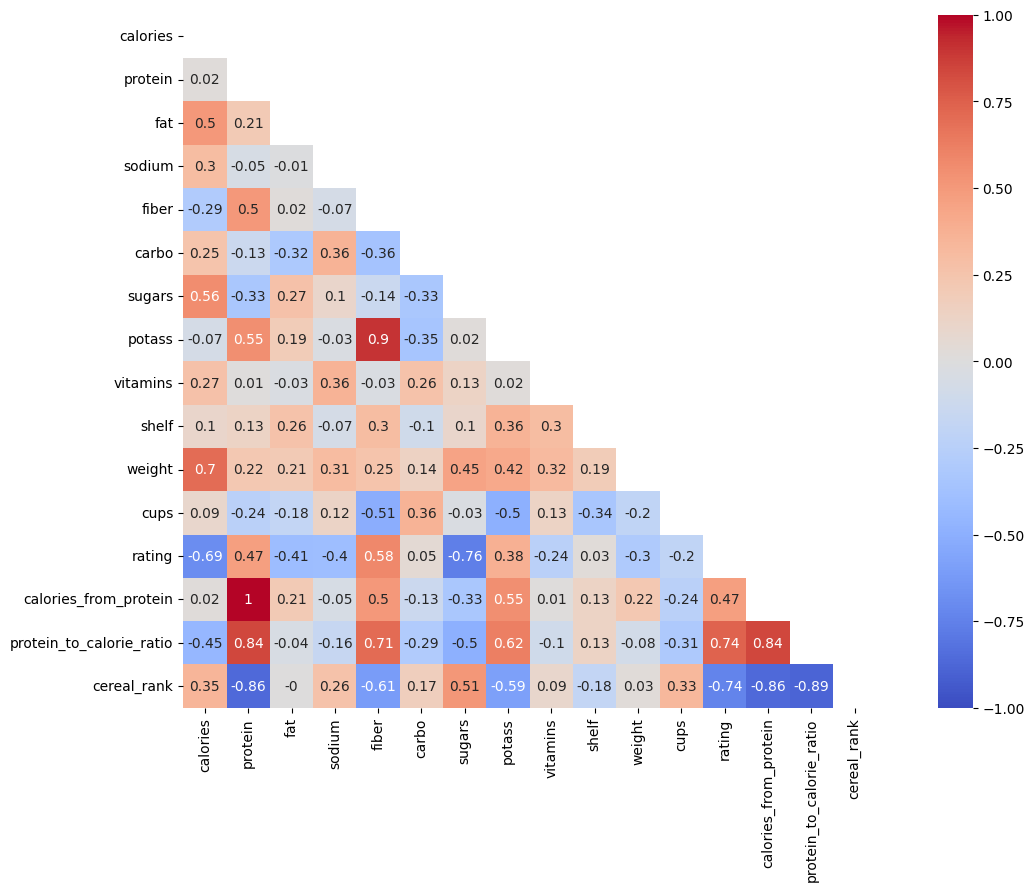

In [ ]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize=(16,9))
# Get correlation of variables.
sns.heatmap
# Set up mask to be "True" in the upper triangle. !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
core = cereal.corr(numeric_only=True).round(2)
mask = np.zeros_like(core)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap

sns.heatmap(core,
            square = True,
            cmap="coolwarm",
            annot=True,
            vmax= 1,
            vmin=-1,
            mask=mask)

In [ ]:
cereal.corr(numeric_only = True)[['rating']].sort_values(by = 'rating', ascending = False)

,rating
rating,1.000000
protein_to_calorie_ratio,0.743185
fiber,0.584160
protein,0.470618
calories_from_protein,0.470618
potass,0.380165
carbo,0.052055
shelf,0.025159
cups,-0.203160
vitamins,-0.240544


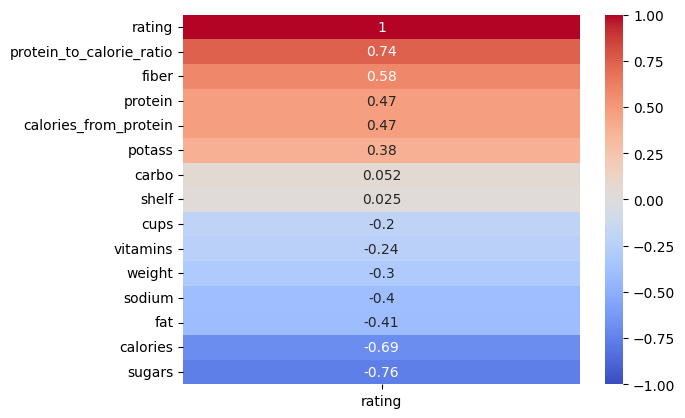

In [ ]:
# # Let's look at the correlations to rating
# # This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# # Establish size of figure.
# plt.figure(figsize=(16,9))
# # Get correlation of variables.
# sns.heatmap
# # Set up mask to be "True" in the upper triangle. !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# core = cereal_analysis.corr(numeric_only=True)
# mask = np.zeros_like(core)
# mask[np.triu_indices_from(mask)] = True

# # Plot our correlation heatmap
sns.heatmap(cereal.corr(numeric_only = True)[['rating']].sort_values(by = 'rating', ascending = False,),annot=True, cmap='coolwarm', vmax=1,vmin=-1);

            

Correlation refers to a statistical relationship between two variables. When two variables are correlated, changes in one variable are associated with changes in the other variable. A correlation can be positive (meaning that the two variables move in the same direction) or negative (meaning that the two variables move in opposite directions). However, correlation does not imply causation.

Correlation can be a useful tool to identify potential relationships between variables, but it is not sufficient to establish causation.

[Spurious Correlations](https://www.tylervigen.com/spurious-correlations)

## Advanced: Subplots
> We can use subplots to easily compare multiple visualizations by sharing an axis.

In [ ]:
stocks = pd.read_csv('food-stocks.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Date,DPZ,MCD,WEN,YUM
0,2020-04-13,355.140015,180.119995,16.570000,77.059998
1,2020-04-14,358.260010,183.990005,17.170000,79.889999
2,2020-04-15,354.619995,177.839996,16.740000,77.639999
3,2020-04-16,360.470001,179.500000,17.280001,80.110001
4,2020-04-17,362.970001,186.100006,18.400000,84.169998


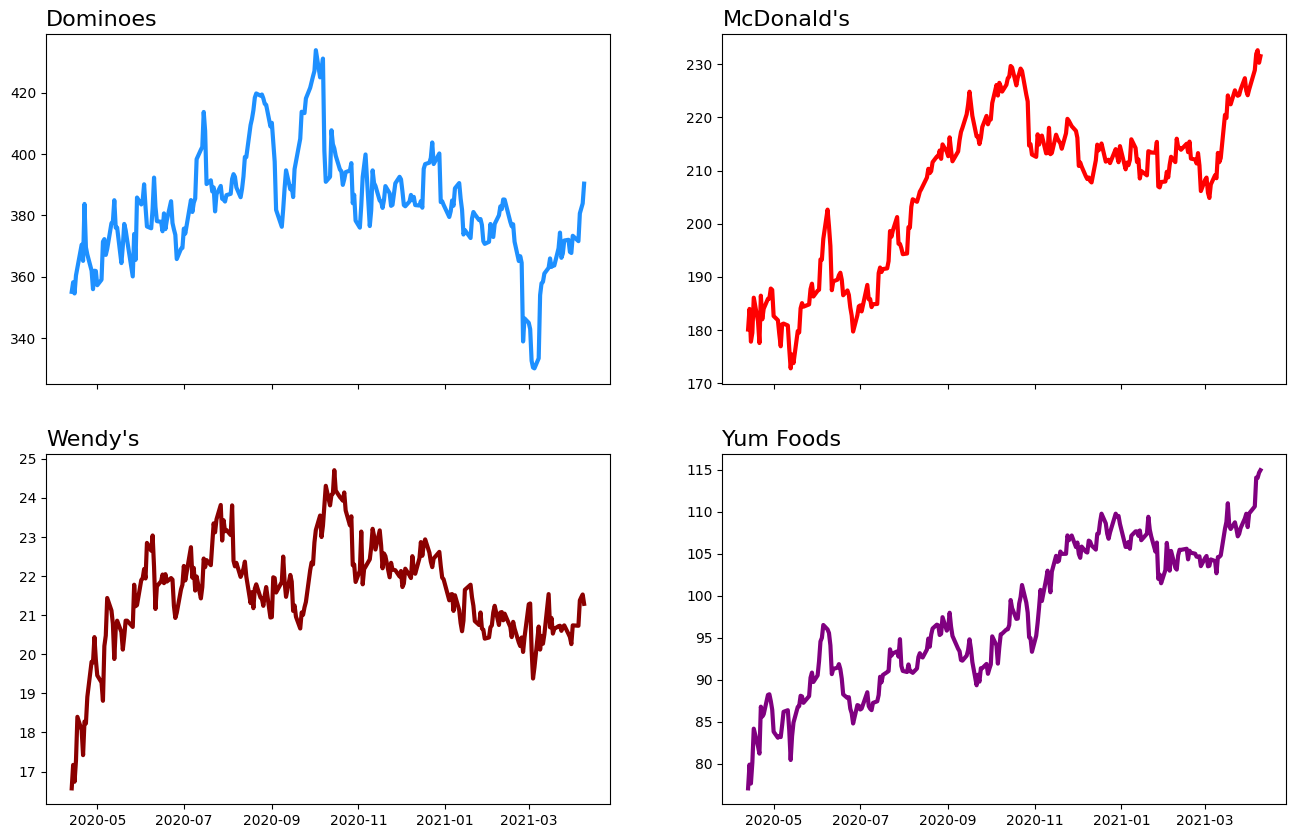

In [ ]:
# Create the figure and list of axes.
# We can also set the figsize here.
# Additionally, set sharex=True to keep x-axes aligned
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

# First determine an axis to operatoe on and then create the plot!
axs[0][0].plot(stocks['Date'], stocks['DPZ'], color='dodgerblue', linewidth=3)
axs[0][0].set_title('Dominoes', size=16, loc='left')

# We can do this for all the other stocks!
axs[0][1].plot(stocks['Date'], stocks['MCD'], color='red', linewidth=3)
axs[0][1].set_title('McDonald\'s', size=16, loc='left')

axs[1][0].plot(stocks['Date'], stocks['WEN'], color='darkred', linewidth=3)
axs[1][0].set_title('Wendy\'s', size=16, loc='left')

axs[1][1].plot(stocks['Date'], stocks['YUM'], color='purple', linewidth=3)
axs[1][1].set_title('Yum Foods', size=16, loc='left');

---

## More Visualization Libraries in Python

In this lesson, you saw the vanilla matplotlib API and [Seaborn](https://seaborn.pydata.org/) (which uses Matplotlib under the hood). Other Popular Python visualization libraries include the following, which can be used for more advanced plots (like maps) or for interactive plotting:
- [Bokeh](http://bokeh.pydata.org/en/latest/)
- [Altair](https://altair-viz.github.io/)
- [Plotly](https://plot.ly/python/getting-started/)

## Other Visualization Tools

A variety of non-programming tools are also used in industry. However, not all of these are great for repeated analysis, customizable, or free! For example:
- Excel
- Power BI
- Tableau

---

## Matplotlib gallery

See the possibilities of matplotlib [here](https://matplotlib.org/3.2.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py).
- These examples are to show what's possible. Don't feel you need to memorize any of them. 

---

## Choosing the Right Chart Type

**If-This-Then-That Guidelines**

### Just a number or two
If showing just one or two numbers, then:
   - simply report the numbers.
   - compare numbers using a bar chart.
   
### One Variable
If visualizing the distribution of one variable, then:
   - If the variable is qualitative, (categorical: nominal or ordinal): use a bar chart.
   - If the variable is quantitative (numeric: ratio or interval): use a histogram.
    
### Two Variables
If visualizing the relationship between two variables, then:
   - If both variables are quantitative, then:
       - If one variable is time, then use a line plot.
       - Otherwise, use a scatter plot - or a box plot if want to show stats.
   - If one variable is quantitative and another is qualitative, then use multiple histograms.
   - If both variables are qualitative, then:
       - Use a table or a heat map.

### Three+ Variables
- Use a heat map, box plot, or multiple scatter plots

That should cover 95%+ of cases you'll see. 😀


### Avoid...
- Pie Charts
- 3-D Charts